In [1]:
from MulticoreTSNE import MulticoreTSNE as TSNE
from matplotlib import pyplot as plt
from tools import utils
import torch
import torch.functional as F

scaler = torch.cuda.amp.GradScaler()

In [2]:
ckpt_pretrained = 'weights/supcon_first_stage/swa'
data_dir = 'data/cifar10'
num_classes = 10
batch_sizes = {
    "train_batch_size": 20,
    'valid_batch_size': 20
}
num_workers = 16
backbone = 'resnet18'
stage = 'first'

transforms = utils.build_transforms(second_stage=(stage == 'second'))
loaders = utils.build_loaders(data_dir, transforms, batch_sizes, num_workers, second_stage=(stage == 'second'))
    

ERROR! Session/line number was not unique in database. History logging moved to new session 240
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


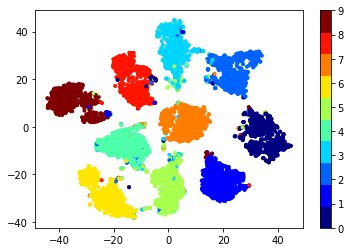

In [3]:
model = utils.build_model(backbone, second_stage=(stage == 'second'), num_classes=num_classes, ckpt_pretrained=ckpt_pretrained).cuda()
model.eval()

embeddings, labels = utils.compute_embeddings(loaders['valid_loader'], model, scaler)
embeddings_tsne = TSNE(n_jobs=num_workers).fit_transform(embeddings)
vis_x = embeddings_tsne[:, 0]
vis_y = embeddings_tsne[:, 1]
plt.scatter(vis_x, vis_y, c=labels, cmap=plt.cm.get_cmap("jet", num_classes), marker='.')
plt.colorbar(ticks=range(num_classes))
plt.show()